## Анализ оттока и поведения клиентов

### Описание проекта - основная задача

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

### План проекта

[ШАГ 1 Загрузить файл](#step1)  
- Импортировать файлы с исходными данными

[Шаг 2 Изучите и проверьте данные](#step2)  
- Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());
- Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());
- Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
- Постройте матрицу корреляций и отобразите её.

[Шаг 3 Постройте модель прогнозирования оттока клиентов](#step3)  
Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
- Разбейте данные на обучающую и валидационную выборку функцией train_test_split().
- Обучите модель на train-выборке двумя способами: логистической регрессией, случайным лесом.
- Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

[Шаг 4. Сделайте кластеризацию клиентов](#step4)  
Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (клиентов):
- Стандартизируйте данные.
- Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.
- Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).
- Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
- Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?
- Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

[Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами](#step5)  

- Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с клиентами и их удержания. Не описывайте стратегию детально: достаточно 3-4 важных принципов и примеров их реализации в виде определённых маркетинговых действий.





### Шаг 1. Открываем файл с данными и изучаем общую информацию <a id="step1"></a>  

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')


gym_churn = pd.read_csv('/datasets/gym_churn.csv')

display(gym_churn.head())
gym_churn.columns = map(str.lower, gym_churn.columns)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


### Вывод

Загрузил датасет, поправил названия столбцов датасета.

### Шаг 2. Подробное изучение данных <a id="step2"></a>  

Описание датасета

In [2]:
display(gym_churn.describe()) # изучение датасета с помощью метода describe
print ('Дубликатов в данных:', gym_churn.duplicated().sum())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Дубликатов в данных: 0


Сгрупированный датасет

In [3]:
gym_churn_group = gym_churn.groupby(['churn']).agg({'gender':'mean','near_location':'mean','partner':'mean',\
                                                    'promo_friends':'mean','phone':'mean','contract_period':'mean',\
                                                    'group_visits':'mean','age':'mean','avg_additional_charges_total':'mean',\
                                                    'month_to_end_contract':'mean','lifetime':'mean','avg_class_frequency_total':'mean',\
                                                    'avg_class_frequency_current_month':'mean'}).reset_index()
print(gym_churn_group)
#display(gym_churn_group.describe()) # изучение cгрупированного датасета с помощью метода describe

   churn    gender  near_location   partner  promo_friends     phone  \
0      0  0.510037       0.873086  0.534195       0.353522  0.903709   
1      1  0.510839       0.768143  0.355325       0.183789  0.902922   

   contract_period  group_visits        age  avg_additional_charges_total  \
0         5.747193      0.464103  29.976523                    158.445715   
1         1.728558      0.268615  26.989632                    115.082899   

   month_to_end_contract  lifetime  avg_class_frequency_total  \
0               5.283089  4.711807                   2.024876   
1               1.662582  0.990575                   1.474995   

   avg_class_frequency_current_month  
0                           2.027882  
1                           1.044546  


Столбчатые гистограммы и распределения признаков

In [ ]:
plt.subplots(figsize = (20, 15))
num_cols = 5
num_rows = len(gym_churn.columns.values)//num_cols + 1
for i, col in enumerate(gym_churn.columns.values):
    sns.distplot(gym_churn.query('churn==1')[col], label='Churn', ax=plt.subplot(num_rows, num_cols, i+1))
    sns.distplot(gym_churn.query('churn==0')[col], label='Stay')
    plt.title(col)
    if i == 0: plt.legend()

Матрица корреляции

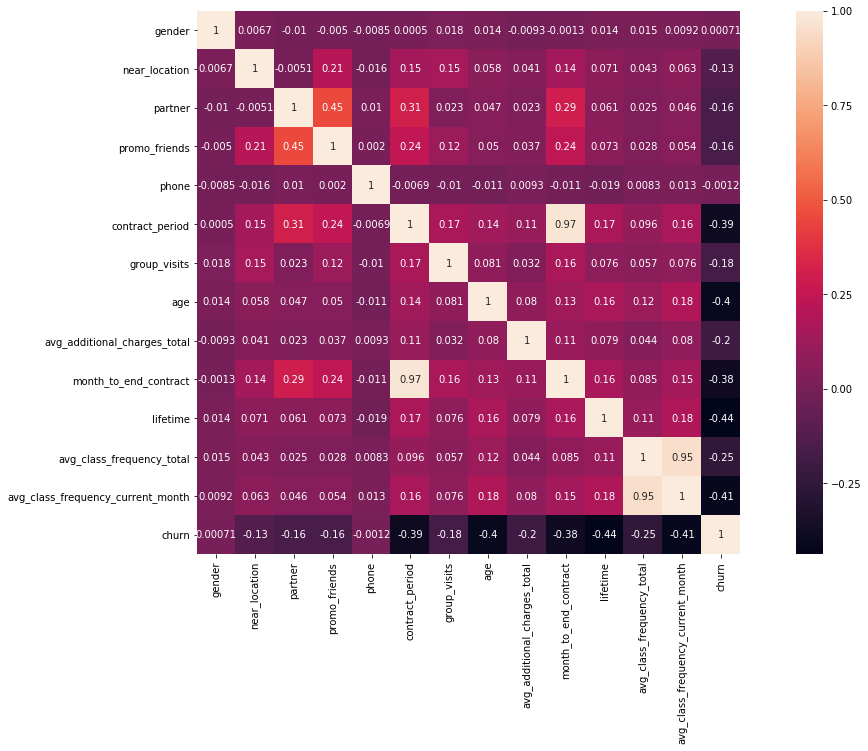

In [5]:
cm = gym_churn.corr()  
fig, ax = plt.subplots(figsize=(20,10))

sns.heatmap(cm, annot = True, square=True)
plt.title('Correlation matrix')
plt.show()

### Вывод

После изучения данных, можно сделать следующие выводы: 
- Пропусков нет
- Дубликатов тоже нет
- У признаков gender, partner, promo_friends, group_visits среднее значение близко к стандартному отклонению - это означает, что группы клиентов примерно равны по данному признаку
- Для признаков near_location, phone стандартное отклонение не сильно большое и есть перевес одной группы клиентов, в нашем случае - это пользователи, которые находятся рядом с залом и у кого есть мобильный телефон, их большинство.

При группировке пользователей на ушедших и оставшихся и сравнении признаков можно выделить основные признаки это:
- promo_friends
- сontract_period
- group_visits
- avg_additional_charges_total
- month_to_end_contract
- lifetime
- avg_class_frequency_current_month
- avg_class_frequency_total
C помощью диаграмм подвердили важность предыдущих признаков и добавим еще один признак age, видно что более молодые клиенты чаще покидают зал.

На матрице корреляции мы видим, что у признаков:
- мы оказались правы при выявление важных признаков, у всех наблюдаеются хорошая прямая или обратная зависимость
- month_to_end_contract и сontract_period высокая прямая зависимость, коэффицент корреляции равен 0.97
- avg_class_frequency_current_month и avg_class_frequency_total высокая прямая зависимость, коэффицент корреляции равен 0.95


### Шаг 3. Постройте модель прогнозирования оттока клиентов <a id="step3"></a>  

Функция вывода метрик модели

In [6]:
def print_all_metrics(y_true, y_pred, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

Разбиение данных на обучающую и валидационную выборки

In [7]:
X = gym_churn.drop(columns = ['churn'])
y = gym_churn['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Модель 1: Логистическая регрессия

In [8]:
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)

lr_predictions = model_1.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
print_all_metrics(y_test, lr_predictions , title='Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.93
	Precision: 0.86
	Recall: 0.83


Модель 2: Случайный лес

In [10]:
for estimators in range(150, 250, 10):
    model_2 = RandomForestClassifier(n_estimators = estimators,random_state = 0)
    model_2.fit(X_train, y_train)
    rf_predictions = model_2.predict(X_test)
    
    print('Для', estimators, 'метрики равны:')
    print_all_metrics(y_test, rf_predictions, title = '')


Для 150 метрики равны:

	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82
Для 160 метрики равны:

	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
Для 170 метрики равны:

	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
Для 180 метрики равны:

	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
Для 190 метрики равны:

	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
Для 200 метрики равны:

	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82
Для 210 метрики равны:

	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82
Для 220 метрики равны:

	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82
Для 230 метрики равны:

	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82
Для 240 метрики равны:

	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82


### Вывод

Cравнив между собой модели логистический лес и логистическая регрессия можно с помощью метрик Accuracy, Precision и Recall можно сделать вывод, что модель логистическая регрессия для нас лучше подходит. Подобрав оптимальное значение n_estimators для модели логистический лес на уровне 160 значения метрик хуже, чем для модели логистическая регрессия.

### Шаг 4. Сделайте кластеризацию клиентов <a id="step4"></a>  

Матрица расстояний и дендограмма

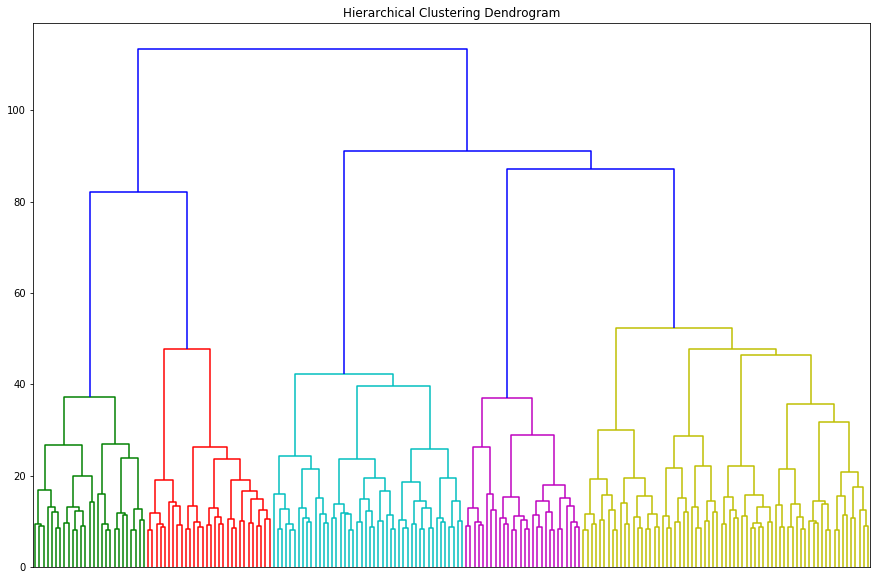

In [11]:
sc = StandardScaler()
X_sc = sc.fit_transform(gym_churn)
linked = linkage(X_sc, method = 'ward')

plt.figure(figsize=(15, 10))   
dendrogram(linked, orientation='top',
truncate_mode='lastp',  
p=200, 
show_leaf_counts=False,
leaf_rotation=90.,
leaf_font_size=200.,)
plt.title('Hierarchical Clustering Dendrogram') 
plt.show()

Обучение модели кластеризации на основании алгоритма K-Means

In [12]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(X_sc)
gym_churn['cluster_km'] = labels
gym_churn_group_cluster = gym_churn.groupby(['cluster_km']).mean()

In [13]:
gym_churn_group_cluster

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.474478,0.828306,0.446636,0.254060,1.000000,2.647332,0.381671,30.015081,153.787010,2.464037,4.674014,1.180639,1.179577,0.001160
1,0.551887,0.839623,0.376179,0.215802,0.998821,2.739387,0.441038,29.976415,159.918546,2.521226,4.593160,2.929273,2.936258,0.007075
2,0.526178,0.869110,0.471204,0.308901,0.000000,4.816754,0.429319,29.340314,144.517762,4.502618,3.955497,1.857525,1.727260,0.261780
3,0.506908,0.759830,0.341126,0.179596,0.996812,1.566419,0.257173,26.907545,114.993470,1.513284,0.975558,1.448150,1.025562,0.997875
4,0.502585,0.938987,0.767322,0.563599,1.000000,11.174767,0.558428,29.902792,161.514934,10.222337,4.701138,2.008336,2.002687,0.015512


In [14]:
quantitative_feature = gym_churn.drop(columns = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits'])

In [15]:
category_feature = gym_churn.drop(columns = ['age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'contract_period'])

Графики scatterplot для численных признаков

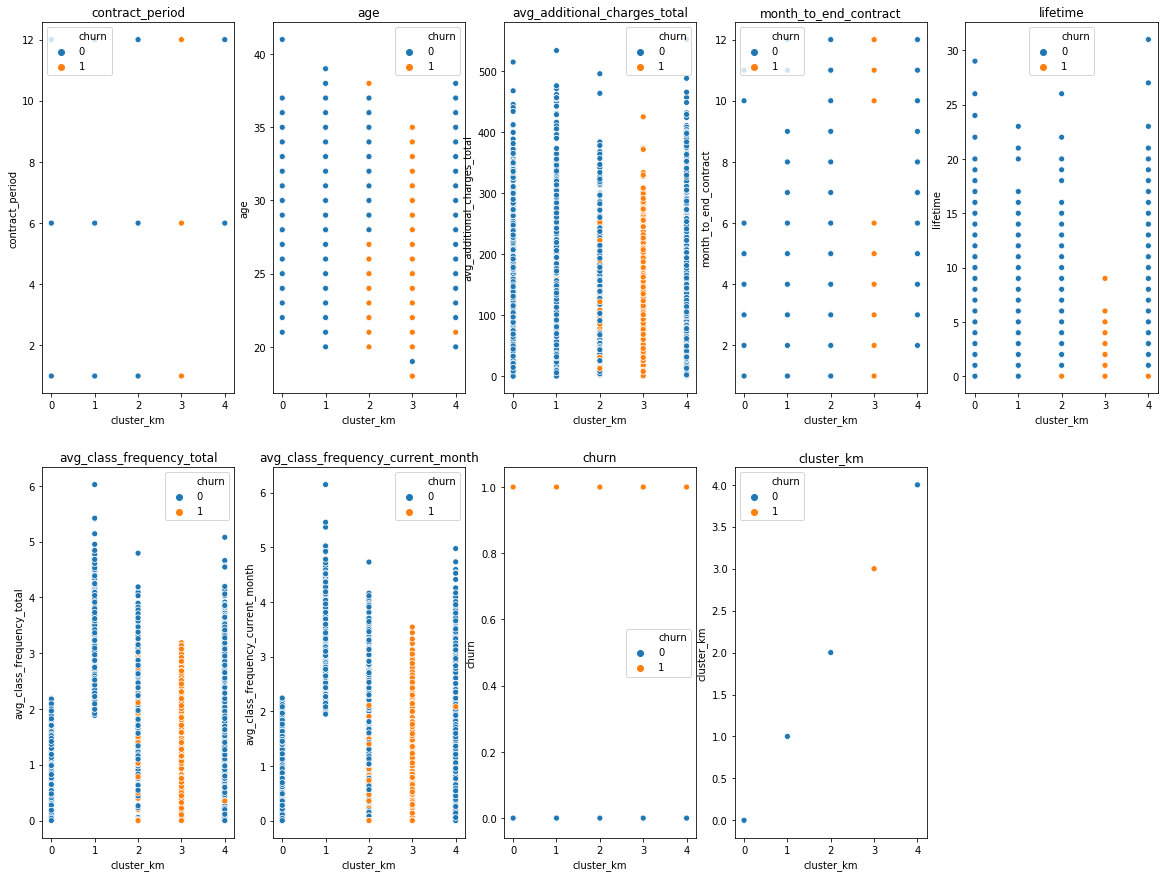

In [16]:
plt.subplots(figsize = (20, 15))
num_cols = 5
num_rows = len(quantitative_feature.columns.values)//num_cols + 1
for i, col in enumerate(quantitative_feature.columns.values):
    sns.scatterplot(x = 'cluster_km', y = col, hue = 'churn', data = quantitative_feature, ax=plt.subplot(num_rows, num_cols, i+1))
    plt.title(col)
    if i == 0: plt.legend()

Барплоты для категориальных признаков

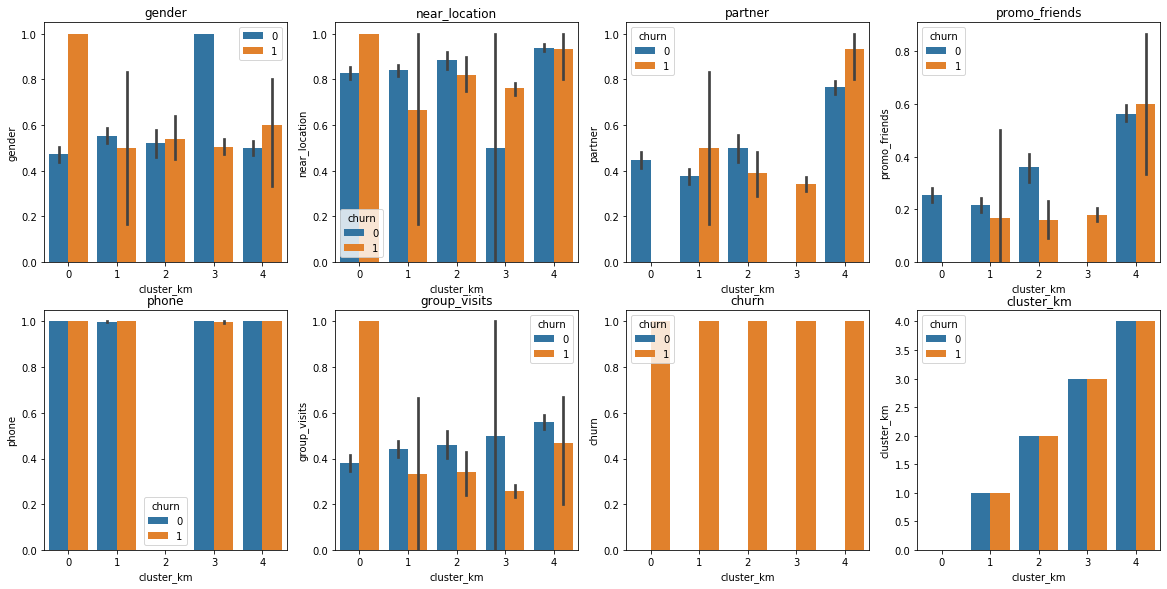

In [17]:
plt.subplots(figsize = (20, 15))
num_cols = 4
num_rows = len(category_feature.columns.values)//num_cols + 1
for i, col in enumerate(category_feature.columns.values):
    sns.barplot(x = 'cluster_km', y = col, hue = 'churn', data = category_feature, ax=plt.subplot(num_rows, num_cols, i+1))
    plt.title(col)
    if i == 0: plt.legend()

Считаем долю оттока клиентов по каждому кластеру

In [18]:
gym_churn_group_cluster_out = gym_churn.query('churn == 1').groupby(['cluster_km'])['gender'].count()

gym_churn_group_cluster_all = gym_churn.groupby(['cluster_km'])['partner'].count()

In [19]:
gym_churn_group_cluster_all

cluster_km
0    862
1    848
2    382
3    941
4    967
Name: partner, dtype: int64

In [20]:
gym_churn_group_cluster_main = pd.concat([gym_churn_group_cluster_all, gym_churn_group_cluster_out], axis=1).reset_index()
gym_churn_group_cluster_main['percent'] = gym_churn_group_cluster_main['gender']/gym_churn_group_cluster_main['partner']
display(gym_churn_group_cluster_main)

,cluster_km,partner,gender,percent
0,0,862,1,0.001160
1,1,848,6,0.007075
2,2,382,100,0.261780
3,3,941,939,0.997875
4,4,967,15,0.015512


### Вывод

Разбили нашу группу пользователей на 5 кластеров.
На основе средних значений признаков в кластерах можно:

- Кластер 1: сформирован на основе признака phone, все пользователи без телефона
- Кластер 2: сформирован на основе признаков contract_period, promo_friends и near_location, они самые высокие 11.173913, 0.564182 и 0.938923 соответственно
- Кластер 3: содержит в себе средние значения по всем признакам за исключением оттока - churn, он самый большой.
- Кластер 4: сформирован на основе признака churn, он самый высокий 0.997875
- Кластер 5: содержит в себе средние значения по всем признакам и самое низкое значений признака churn - 0.007067


### Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами <a id="step5"></a>  

### Вывод

Основными признаками для анализа служат:
- promo_friends (факт первоначальной записи в рамках акции «приведи друга»)
- сontract_period (длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год))
- group_visits (факт посещения групповых занятий)
- avg_additional_charges_total (суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон)
- month_to_end_contract (срок до окончания текущего действующего абонемента (в месяцах))
- lifetime (время с момента первого обращения в фитнес-центр (в месяцах))
- avg_class_frequency_current_month (средняя частота посещений в неделю за предыдущий месяц)
- avg_class_frequency_total (средняя частота посещений в неделю за все время с начала действия абонемента)

Разбили нашу группу пользователей на 5 кластеров.
На основе средних значений признаков в кластерах можно:

- Кластер 1: сформирован на основе признака phone, все пользователи без телефона
- Кластер 2: сформирован на основе признаков contract_period, promo_friends и near_location, они самые высокие 11.173913, 0.564182 и 0.938923 соответственно
- Кластер 3: содержит в себе средние значения по всем признакам за исключением оттока - churn
- Кластер 4: сформирован на основе признака churn, он самый высокий 0.997875
- Кластер 5: содержит в себе средние значения по всем признакам и самое низкое значений признака churn - 0.007067

В качестве рекоммендаций можно выделить следующие:
- пользователи, которые приобрели абонементы на долгий срок чаще остаются постоянными клиентами, можно предлагать акции на приобритение долгосрочных абонементов.
- видно, что в случае, если клиент не посещает зал хотя бы раз в неделю, то он уйдет. Решением может быть стимуляция и напоминанием клиентам о посещении.
- пользователи, которые живут или работают рядом, реже покидают зал. Маркетинговые акции нужно нацелить на конкретные территории, где территориально находятся залы.
- пользователи, которые пришли по рекомендации друзей, тоже редко уходят. Поэтому нужно стимулировать текущих пользователей приглашать друзей. С групповыми визиты нужно поступить аналогично.
- большой отток клиентов в возрасте 15-20 лет. Чтобы это улучшить можно добавить для таких клиентов определенные занятия и тренажеры, рассчитанные на данную аудиторию.
